# 52 Exercises: Heat Maps, Spatial Charts, and Contour Charts - R
Michael Hotaling

In [1]:
options(warn=-1)
library(ggplot2)
library(readxl)
library(tidyr)
library(dplyr)
library(readr)
library(patchwork)
library(reshape2)
library("rnaturalearth")
library("rnaturalearthdata")
library(ggmap)
library(grid)
library(gplots)
library(reticulate)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



# Heat Maps

In [2]:
df <- read.csv("ppg2008.csv")
df2 <- cor(select(df, -'Name'))
df3 <- melt(df2)

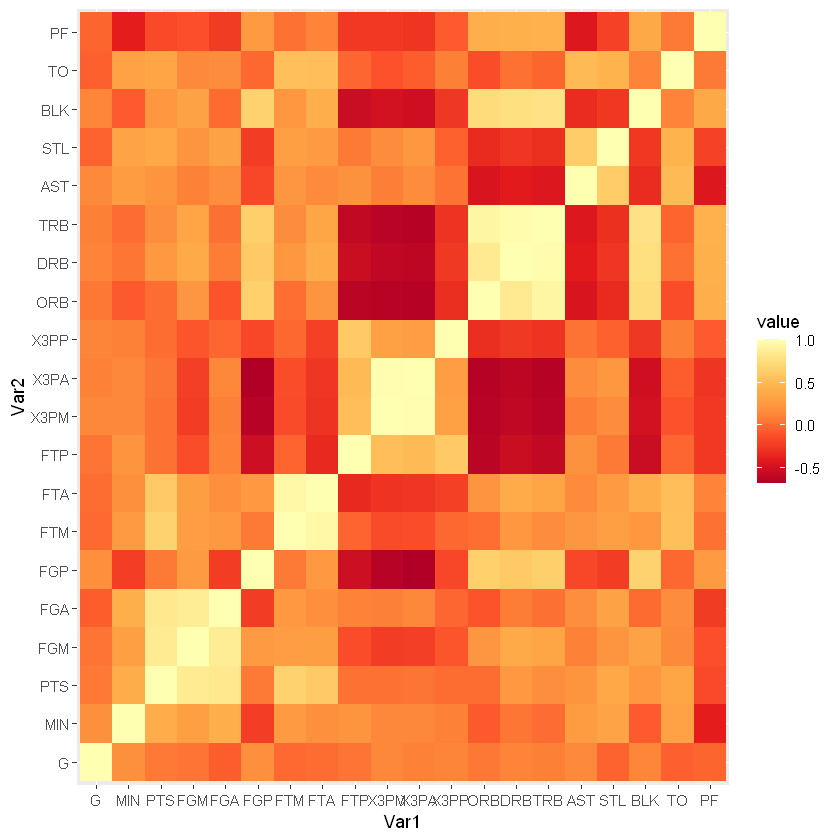

In [3]:
ggplot(data = df3, aes(x=Var1, y=Var2, fill=value)) + 
geom_tile() + 
scale_fill_distiller(palette="YlOrRd") 

In [4]:
df3 <- as.data.frame(scale(select(df, -'Name')))
df4 <- cbind(df$Name, df3)
df4 <- melt(df4)
names(df4) <- c("Name",'variable','value')

Using df$Name as id variables


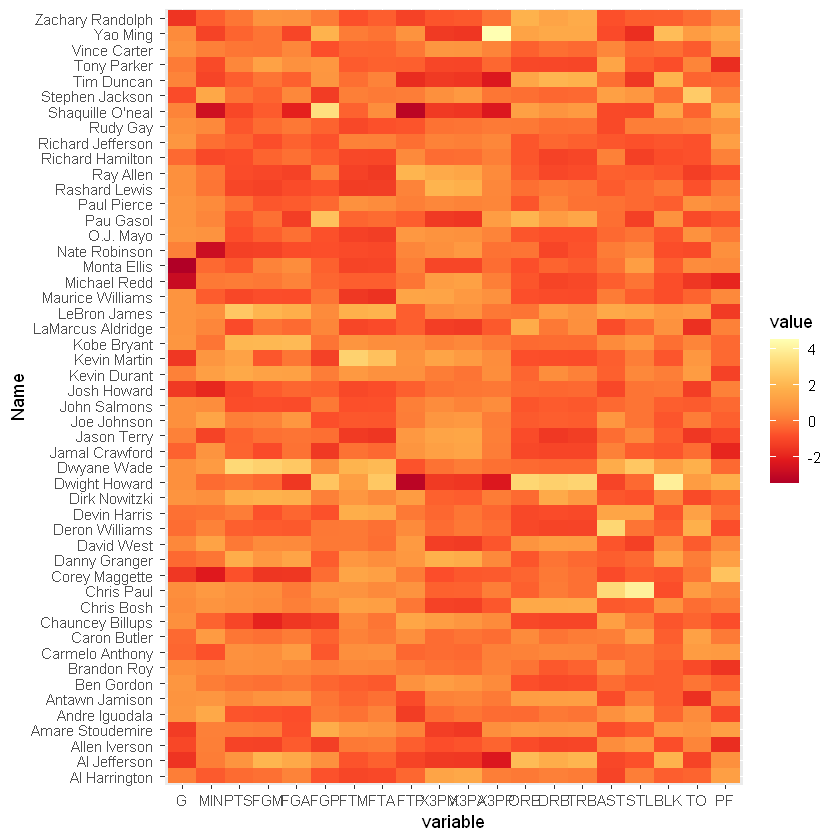

In [5]:
ggplot(df4, aes(x = variable,Name )) +
geom_tile(aes(fill = value)) + 
scale_fill_distiller(palette="YlOrRd")

# Spatial Charts

In [6]:
df <- read.csv("costcos-geocoded.csv")

In [7]:
world <- ne_countries(scale = "medium", returnclass = "sf")
MainStates <- map_data("state")

Source : http://tile.stamen.com/terrain/5/4/10.png
Source : http://tile.stamen.com/terrain/5/5/10.png
Source : http://tile.stamen.com/terrain/5/6/10.png
Source : http://tile.stamen.com/terrain/5/7/10.png
Source : http://tile.stamen.com/terrain/5/8/10.png
Source : http://tile.stamen.com/terrain/5/9/10.png
Source : http://tile.stamen.com/terrain/5/10/10.png
Source : http://tile.stamen.com/terrain/5/11/10.png
Source : http://tile.stamen.com/terrain/5/4/11.png
Source : http://tile.stamen.com/terrain/5/5/11.png
Source : http://tile.stamen.com/terrain/5/6/11.png
Source : http://tile.stamen.com/terrain/5/7/11.png
Source : http://tile.stamen.com/terrain/5/8/11.png
Source : http://tile.stamen.com/terrain/5/9/11.png
Source : http://tile.stamen.com/terrain/5/10/11.png
Source : http://tile.stamen.com/terrain/5/11/11.png
Source : http://tile.stamen.com/terrain/5/4/12.png
Source : http://tile.stamen.com/terrain/5/5/12.png
Source : http://tile.stamen.com/terrain/5/6/12.png
Source : http://tile.stamen

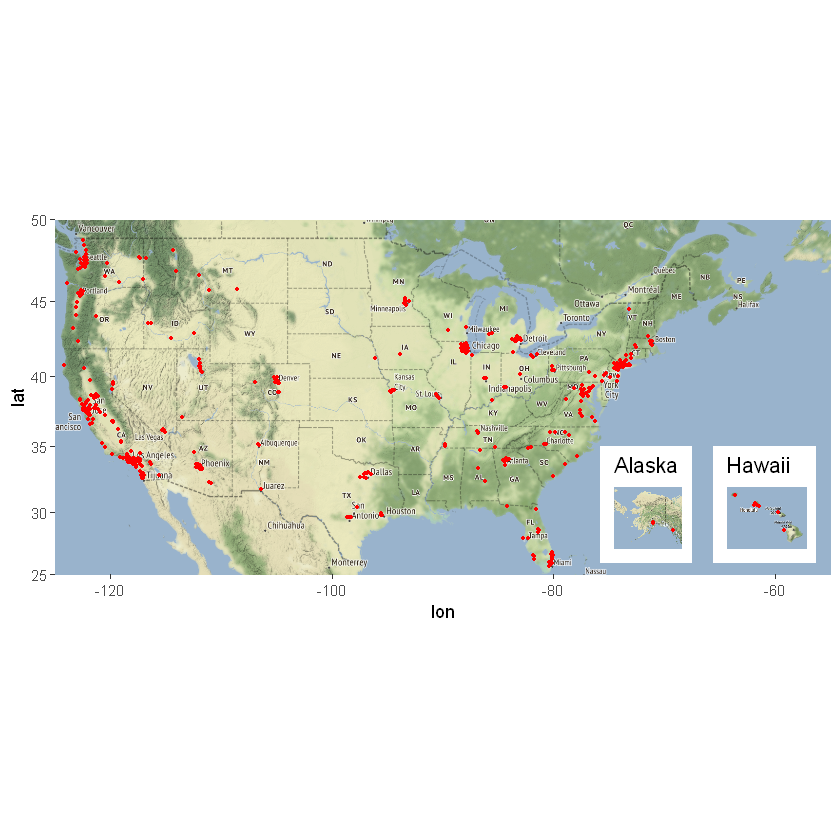

In [8]:
us_bbox <- c(left = -125, bottom = 25, right = -55, top = 50)
us_main_map <- get_stamenmap(us_bbox, zoom = 5, maptype = "terrain")
p_main <- ggmap(us_main_map) + geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'red', size = 0.75) 


alaska_bbox <- c(left = -180, bottom = 50, right = -128, top = 72)
alaska_map <- get_stamenmap(alaska_bbox, zoom = 5, maptype = "terrain") 
p_alaska <- ggmap(alaska_map) + 
    geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'red', size = 0.75) +
    labs(title = "Alaska") +
    theme(axis.title = element_blank(), 
          axis.text  = element_blank(),
          axis.ticks = element_blank())
hawaii_bbox <- c(left = -160, bottom = 18.5, right = -154.5, top = 22.5)
hawaii_map <- get_stamenmap(hawaii_bbox, zoom = 6, maptype = "terrain") 
p_hawaii <- ggmap(hawaii_map) + 
    geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'red', size = 0.75) +
    labs(title = "Hawaii") +
    theme(axis.title = element_blank(), 
          axis.text  = element_blank(),
          axis.ticks = element_blank())

p_main +
    inset(ggplotGrob(p_alaska), xmin = -76.7, xmax = -66.7, ymin = 26, ymax = 35) +
    inset(ggplotGrob(p_hawaii), xmin = -66.5, xmax = -55.5, ymin = 26, ymax = 35)

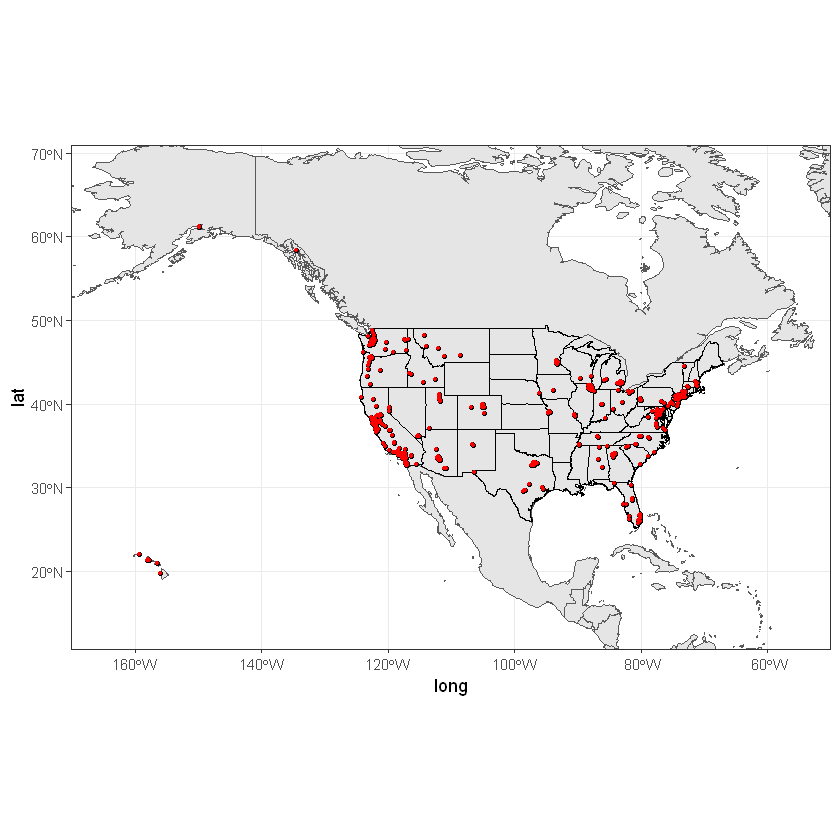

In [9]:
ggplot() +
geom_sf(data = world) + 
coord_sf(xlim = c(-170.15, -50), ylim = c(10.65, 70.97), expand = FALSE) +
geom_polygon( data=MainStates, aes(x=long, y=lat, group=group),
                color="black", alpha = 0)+
geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'black', size = 1) +
geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'red', size = 0.75) +
theme_bw()

In [10]:
con_us <- ggplot() +
geom_sf(data = world) + 
coord_sf(xlim = c(-132.15, -64.12), ylim = c(20.65, 52.97), expand = FALSE) +
geom_polygon( data=MainStates, aes(x=long, y=lat, group=group),
                color="black", alpha = 0)+
geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'black', size = 1) +
geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'red', size = 0.75) +
theme_bw()

In [11]:
alaska <- ggplot() +
geom_sf(data = world) + 
coord_sf(xlim = c(-170, -130), ylim = c(50, 75), expand = FALSE) +
geom_polygon( data=MainStates, aes(x=long, y=lat, group=group),
                color="black", alpha = 0)+
geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'black', size = 1) +
geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'red', size = 0.75) +
theme_bw()

In [12]:
hawaii <- ggplot() +
geom_sf(data = world) + 
coord_sf(xlim = c(-161, -154), ylim = c(18, 23), expand = FALSE) +
geom_polygon( data=MainStates, aes(x=long, y=lat, group=group),
                color="black", alpha = 0)+
geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'black', size = 1) +
geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'red', size = 0.75) +
theme_bw()

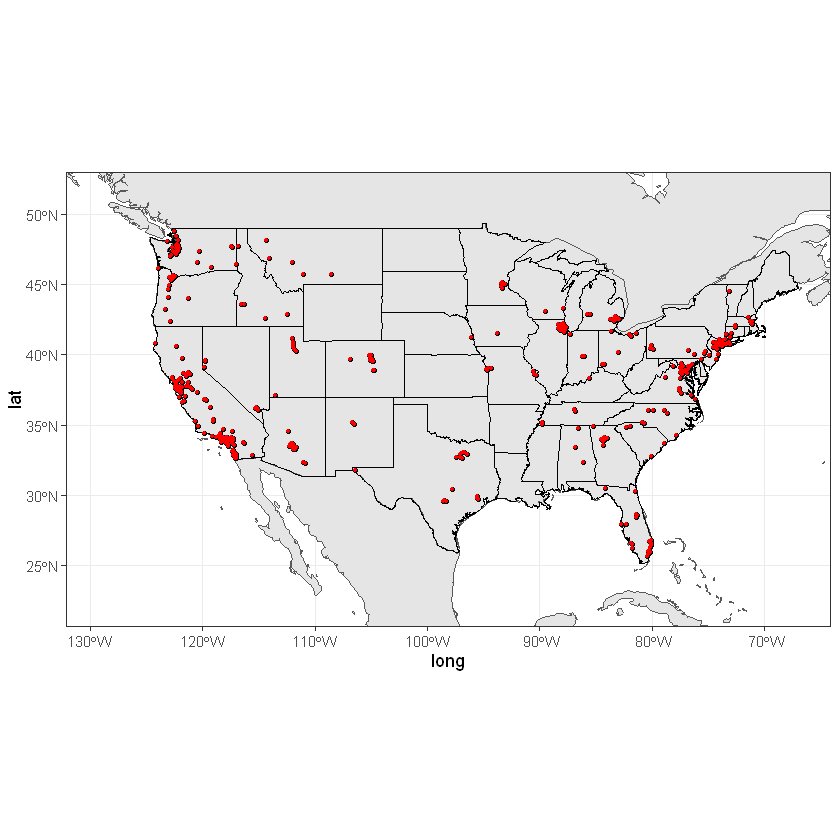

In [13]:
con_us

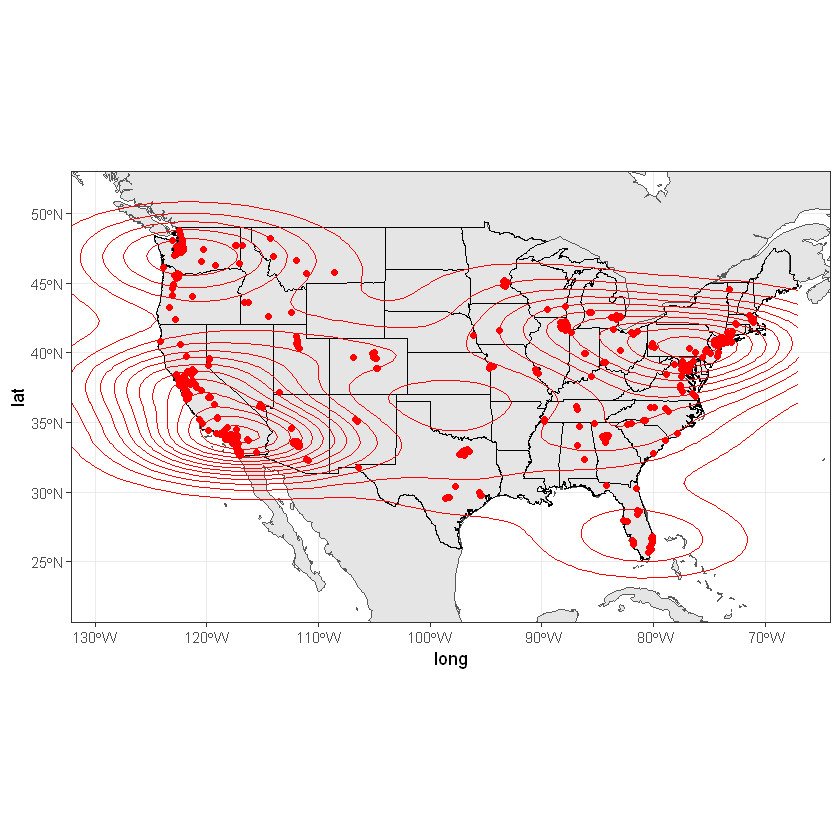

In [14]:
ggplot() +
geom_sf(data = world) + 
geom_polygon( data=MainStates, aes(x=long, y=lat, group=group),
                color="black", alpha = 0)+
coord_sf(xlim = c(-132.15, -64.12), ylim = c(20.65, 52.97), expand = FALSE) +
geom_point(data = df, aes(x = Longitude, y = Latitude), color = 'red') +
stat_density2d(data = df, aes(x = Longitude, y = Latitude), color = 'red') + 
theme_bw()

In [15]:
counts <- df %>% count(State)
names(counts) <- c('region','count')
counts$region <- tolower(counts$region)

In [16]:
MainStates <- map_data("state")

In [17]:
MergedStates <-  inner_join(MainStates, counts, by = "region")

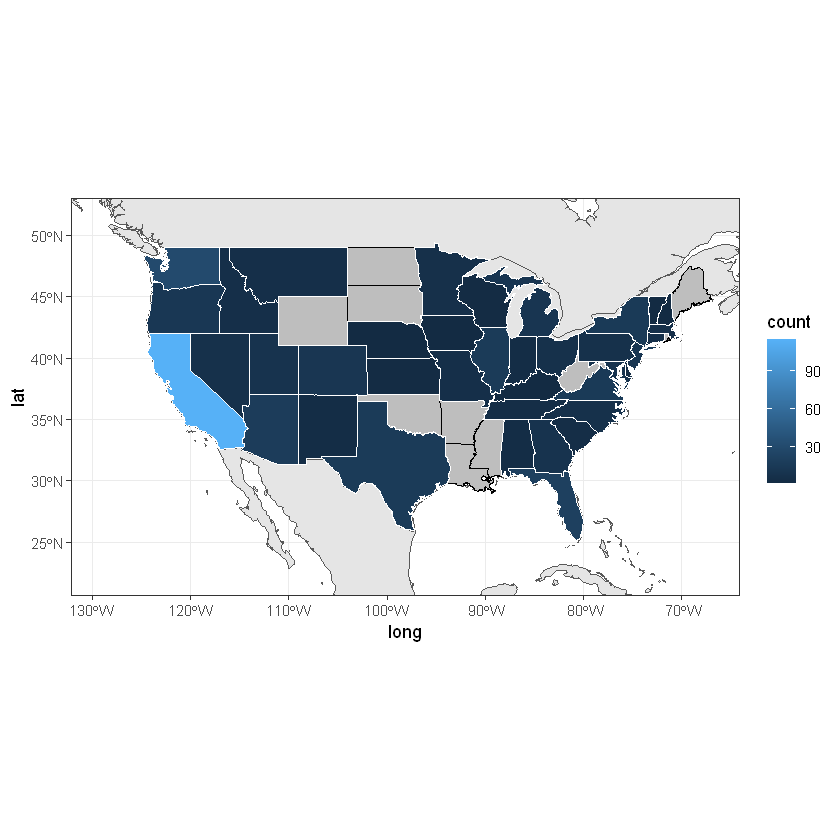

In [18]:
ggplot() +
geom_sf(data = world) + 
geom_polygon( data=MainStates, aes(x=long, y=lat, group=group),
                color="black", fill="gray")+
coord_sf(xlim = c(-132.15, -64.12), ylim = c(20.65, 52.97), expand = FALSE) +
geom_polygon(data=MergedStates, 
          aes(x=long, y=lat, group=group, fill = count), 
          color="white", size = 0.2) +  
theme_bw()

# Contour Charts

In [19]:
library(plotly)


Attaching package: 'plotly'

The following object is masked from 'package:ggmap':

    wind

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [20]:
x = NULL
y = NULL
count = 1

for(i in seq(0.1,5,0.1) ){
    for(j in seq(0.1,5,0.1) ){
        x[count] <- i 
        y[count] <- j 
        count <- count + 1
        }
    }
df <- data.frame(x, y)

df$z <- -sin(df$x) ** 10 + cos(10 + df$y * df$x) * cos(df$x)

In [21]:
z = array_reshape(df$z, c(50, 50))

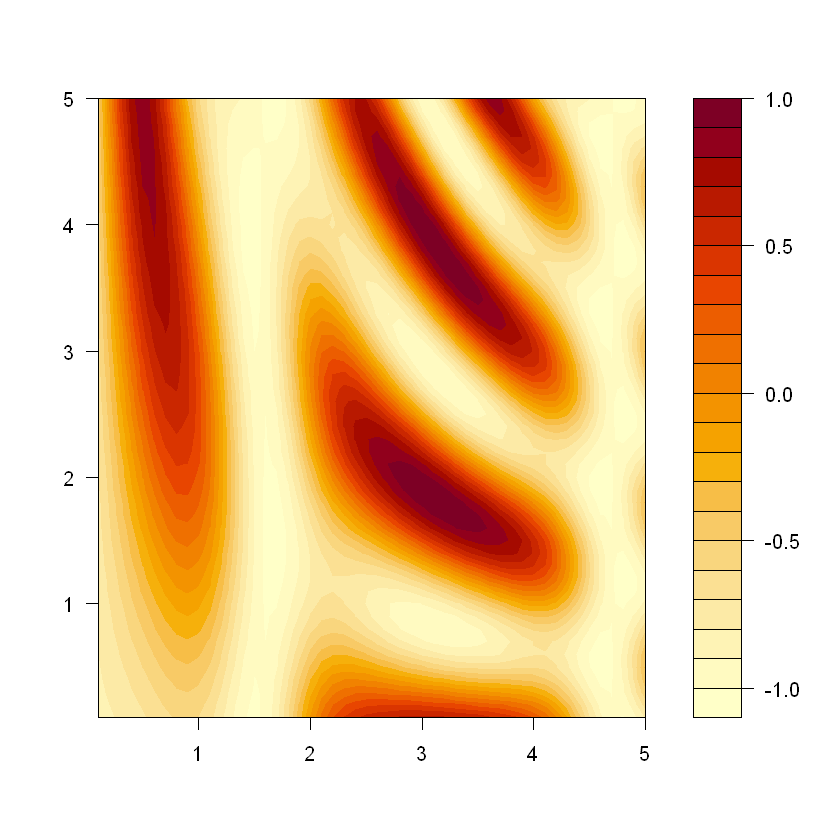

In [22]:
filled.contour(seq(0.1,5,0.1), seq(0.1,5,0.1), z)

In [23]:
plot_ly(x = seq(0.1,5,0.1), y = seq(0.1,5,0.1), z = z) %>% add_surface()


![](3dcontour.JPG)